In [1]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib
%matplotlib inline
#
import plotly.offline as py
py.init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings('ignore')

import json
import pickle
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split, StratifiedKFold
pd.set_option('max_columns', None)

url_matches_19_20 = 'https://api.opendota.com/api/explorer?sql=SELECT%0A%20%20%20%20%20%20%20%20%0Amatches.match_id%2C%0Amatches.start_time%2C%0A((player_matches.player_slot%20%3C%20128)%20%3D%20matches.radiant_win)%20win%2C%0Aplayer_matches.hero_id%2C%0Aplayer_matches.account_id%2C%0Aleagues.name%20leaguename%0AFROM%20matches%0AJOIN%20match_patch%20using(match_id)%0AJOIN%20leagues%20using(leagueid)%0AJOIN%20player_matches%20using(match_id)%0AJOIN%20heroes%20on%20heroes.id%20%3D%20player_matches.hero_id%0ALEFT%20JOIN%20notable_players%20ON%20notable_players.account_id%20%3D%20player_matches.account_id%0ALEFT%20JOIN%20teams%20using(team_id)%0AWHERE%20TRUE%0AAND%20matches.start_time%20%3E%3D%20extract(epoch%20from%20timestamp%20%272019-12-31T23%3A00%3A00.000Z%27)%0AAND%20matches.start_time%20%3C%3D%20extract(epoch%20from%20timestamp%20%272020-12-31T23%3A00%3A00.000Z%27)%0AAND%20leagues.tier%20%3D%20%27professional%27%0AORDER%20BY%20matches.match_id%20NULLS%20LAST%0ALIMIT%20999999'
url_base_match = 'https://api.opendota.com/api/matches/'


def save_obj(obj, name):
    with open('./Data/' + name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name):
    with open('./Data/' + name + '.pkl', 'rb') as f:
        return pickle.load(f)






In [2]:
data = load_obj('matchdata_19_20')

In [3]:
df = pd.DataFrame(columns=['match_id','game_len','radiant_win','radiant1_hero_id','radiant1_kills','radiant1_deaths','radiant1_assists','radiant1_denies','radiant1_gold','radiant1_lh','radiant1_xp','radiant1_level','radiant1_creeps_stacked','radiant1_camps_stacked','radiant1_rune_pickups','radiant1_firstblood_claimed','radiant1_towers_killed','radiant1_roshans_killed','radiant1_obs_placed','radiant1_sen_placed','radiant2_hero_id','radiant2_kills','radiant2_deaths','radiant2_assists','radiant2_denies','radiant2_gold','radiant2_lh','radiant2_xp','radiant2_level','radiant2_creeps_stacked','radiant2_camps_stacked','radiant2_rune_pickups','radiant2_firstblood_claimed','radiant2_towers_killed','radiant2_roshans_killed','radiant2_obs_placed','radiant2_sen_placed','radiant3_hero_id','radiant3_kills','radiant3_deaths','radiant3_assists','radiant3_denies','radiant3_gold','radiant3_lh','radiant3_xp','radiant3_level','radiant3_creeps_stacked','radiant3_camps_stacked','radiant3_rune_pickups','radiant3_firstblood_claimed','radiant3_towers_killed','radiant3_roshans_killed','radiant3_obs_placed','radiant3_sen_placed','radiant4_hero_id','radiant4_kills','radiant4_deaths','radiant4_assists','radiant4_denies','radiant4_gold','radiant4_lh','radiant4_xp','radiant4_level','radiant4_creeps_stacked','radiant4_camps_stacked','radiant4_rune_pickups','radiant4_firstblood_claimed','radiant4_towers_killed','radiant4_roshans_killed','radiant4_obs_placed','radiant4_sen_placed','radiant5_hero_id','radiant5_kills','radiant5_deaths','radiant5_assists','radiant5_denies','radiant5_gold','radiant5_lh','radiant5_xp','radiant5_level','radiant5_creeps_stacked','radiant5_camps_stacked','radiant5_rune_pickups','radiant5_firstblood_claimed','radiant5_towers_killed','radiant5_roshans_killed','radiant5_obs_placed','radiant5_sen_placed','dire1_hero_id','dire1_kills','dire1_deaths','dire1_assists','dire1_denies','dire1_gold','dire1_lh','dire1_xp','dire1_level','dire1_creeps_stacked','dire1_camps_stacked','dire1_rune_pickups','dire1_firstblood_claimed','dire1_towers_killed','dire1_roshans_killed','dire1_obs_placed','dire1_sen_placed','dire2_hero_id','dire2_kills','dire2_deaths','dire2_assists','dire2_denies','dire2_gold','dire2_lh','dire2_xp','dire2_level','dire2_creeps_stacked','dire2_camps_stacked','dire2_rune_pickups','dire2_firstblood_claimed','dire2_towers_killed','dire2_roshans_killed','dire2_obs_placed','dire2_sen_placed','dire3_hero_id','dire3_kills','dire3_deaths','dire3_assists','dire3_denies','dire3_gold','dire3_lh','dire3_xp','dire3_level','dire3_creeps_stacked','dire3_camps_stacked','dire3_rune_pickups','dire3_firstblood_claimed','dire3_towers_killed','dire3_roshans_killed','dire3_obs_placed','dire3_sen_placed','dire4_hero_id','dire4_kills','dire4_deaths','dire4_assists','dire4_denies','dire4_gold','dire4_lh','dire4_xp','dire4_level','dire4_creeps_stacked','dire4_camps_stacked','dire4_rune_pickups','dire4_firstblood_claimed','dire4_towers_killed','dire4_roshans_killed','dire4_obs_placed','dire4_sen_placed','dire5_hero_id','dire5_kills','dire5_deaths','dire5_assists','dire5_denies','dire5_gold','dire5_lh','dire5_xp','dire5_level','dire5_creeps_stacked','dire5_camps_stacked','dire5_rune_pickups','dire5_firstblood_claimed','dire5_towers_killed','dire5_roshans_killed','dire5_obs_placed','dire5_sen_placed'])
for match in data:
    entry=[]
    entry.append(match["match_id"])
    entry.append(match["duration"])
    entry.append(match["radiant_win"])
    for player in match["players"]:
        entry.append(player['hero_id'])
        entry.append(player['kills'])
        entry.append(player['deaths'])
        entry.append(player['assists'])
        entry.append(player['denies'])
        entry.append(player['gold_per_min'])
        entry.append(player['last_hits'])
        entry.append(player['xp_per_min'])
        entry.append(player['level'])
        entry.append(player['creeps_stacked'])
        entry.append(player['camps_stacked'])
        entry.append(player['rune_pickups'])
        entry.append(player['firstblood_claimed'])
        entry.append(player['towers_killed'])
        entry.append(player['roshans_killed'])
        entry.append(player['obs_placed'])
        entry.append(player['sen_placed'])



    df.loc[len(df)] = entry

save_obj(df,"cleaned_df_matchdata")

In [35]:
# Working DF

df_loaded = load_obj("cleaned_df_matchdata")

In [56]:
df_loaded.dropna(axis=0,how= 'any', inplace = True)
df_loaded= df_loaded.astype('int64')
df_cleaned = df_loaded.drop(columns=["radiant_win"])
df_targets = df_loaded[['match_id','radiant_win']]
df_cleaned.set_index("match_id", inplace = True)
df_targets.set_index("match_id", inplace = True)
# df_cleaned.reset_index(level=0, inplace=True)

print(f'Number of samples in cleaned df: {df_cleaned.shape[0]}')
print(f'Number of columns in cleaned df: {df_cleaned.shape[1]}')

for col in df_cleaned.columns:
    if df_cleaned[col].isnull().any():
        print(col, df_cleaned[col].isnull().sum())

X = df_cleaned #.drop(columns=["radiant_win","next_roshan_team"])
y = df_targets
# X.reset_index(drop=True, inplace=True)
# y.reset_index(drop=True, inplace=True)


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=12)
print(f'Number of samples in train: {X_train.shape[0]}')
print(f'Number of columns in train: {X_train.shape[1]}')

print(f'Number of samples in test: {X_test.shape[0]}')
print(f'Number of columns in test: {X_test.shape[1]}')




Number of samples in cleaned df: 21351
Number of columns in cleaned df: 171
Number of samples in train: 17080
Number of columns in train: 171
Number of samples in test: 4271
Number of columns in test: 171


# Descriptive Analysis

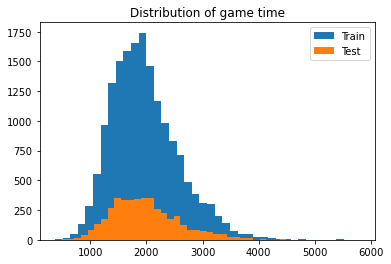

In [57]:
plt.hist(X_train['game_len'], bins=40, label='Train');
plt.hist(X_test['game_len'], bins=40, label='Test');
plt.title('Distribution of game time');
plt.legend();

In [ ]:
radiant_win,dire_win=y_train["radiant_win"].value_counts()

labels = ['Win Rate']
men_means = [radiant_win]
women_means = [dire_win]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Radiant')
rects2 = ax.bar(x + width/2, women_means, width, label='Dire')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Wins')
ax.set_title('Win rate by side')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.show()




ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/opt/conda/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3418, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-14-63e98f96b219>", line 1, in <module>
    radiant_win,dire_win=y_train["radiant_win"].value_counts()
NameError: name 'y_train' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/opt/conda/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2045, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/opt/conda/lib/python3.8/site-packages/IPython/core/ultratb.py", line 1170, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/opt/conda/lib/python3.8/s

**Test logistic regression**

In [59]:
logit = LogisticRegression(C=1, solver='lbfgs', max_iter=500,
                           random_state=17, n_jobs=4,
                          multi_class='multinomial')
logit_pipe = Pipeline([('scaler', StandardScaler()),
                       ('logit', logit)])

In [60]:
%%time
logit_pipe.fit(X_train, y_train)
# this may take a while...

Wall time: 13 s


Pipeline(steps=[('scaler', StandardScaler()),
                ('logit',
                 LogisticRegression(C=1, max_iter=500,
                                    multi_class='multinomial', n_jobs=4,
                                    random_state=17))])

In [61]:
logit_val_pred = logit_pipe.predict(X_test)
accuracy_score(y_test, logit_val_pred)

0.9812690236478576

In [62]:
first_forest = RandomForestClassifier(
    n_estimators=100, random_state=17, n_jobs=4)

In [63]:
%%time
first_forest.fit(X_train, y_train)
# this may take a while... (17ss)

Wall time: 5.21 s


RandomForestClassifier(n_jobs=4, random_state=17)

In [64]:
forest_val_pred = first_forest.predict(X_test)
accuracy_score(y_test, forest_val_pred)

0.96183563568251

In [65]:
pd.DataFrame(first_forest.feature_importances_,
             index=X_train.columns, columns=['Importance']).sort_values(
    by='Importance', ascending=False)[:10]

,Importance
dire3_assists,0.050887
radiant3_assists,0.049442
dire2_assists,0.045877
dire4_assists,0.044402
radiant4_assists,0.038607
radiant5_assists,0.032667
radiant2_assists,0.031800
dire1_assists,0.031396
dire5_assists,0.028397
radiant1_assists,0.026757


In [66]:
lgb_clf = LGBMClassifier(random_state=17)

In [67]:
%%time
lgb_clf.fit(X_train, y_train)

Wall time: 3.11 s


LGBMClassifier(random_state=17)

In [68]:
accuracy_score(y_test, lgb_clf.predict(X_test))

0.9730742214937954

**1 stage of hyper-param tuning: tuning model complexity**

In [69]:
param_grid = {'num_leaves': [7, 15, 31, 63],
              'max_depth': [3, 4, 5, 6, -1]}

In [70]:
grid_searcher = GridSearchCV(estimator=lgb_clf, param_grid=param_grid,
                             cv=5, verbose=1, n_jobs=4)

In [71]:
grid_searcher.fit(X_train, y_train) # This may take a while!

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   28.4s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:  1.2min finished


GridSearchCV(cv=5, estimator=LGBMClassifier(random_state=17), n_jobs=4,
             param_grid={'max_depth': [3, 4, 5, 6, -1],
                         'num_leaves': [7, 15, 31, 63]},
             verbose=1)

In [72]:
grid_searcher.best_params_, grid_searcher.best_score_

({'max_depth': 6, 'num_leaves': 15}, 0.9741217798594848)

In [73]:
accuracy_score(y_test, grid_searcher.predict(X_test))

0.9690938890189651

**2 stage of hyper-param tuning: convergence:**

In [74]:
# This may take a while
num_iterations = 200
lgb_clf2 = LGBMClassifier(random_state=17, max_depth=6,
                          num_leaves=15, n_estimators=num_iterations,
                          n_jobs=1)

param_grid2 = {'learning_rate': np.logspace(-3, 0, 10)}
grid_searcher2 = GridSearchCV(estimator=lgb_clf2, param_grid=param_grid2,
                               cv=5, verbose=1, n_jobs=4)
grid_searcher2.fit(X_train, y_train)
print(grid_searcher2.best_params_, grid_searcher2.best_score_)
print(accuracy_score(y_test, grid_searcher2.predict(X_test)))
# This may take very long !!! 6.3 min

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'learning_rate': 0.21544346900318823} 0.9787470725995316
0.9733083586981971


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  1.2min
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:  1.3min finished


In [75]:
final_lgb = LGBMClassifier(n_estimators=200, num_leaves=15,
                           learning_rate=0.22, max_depth=6,
                         n_jobs=4)


In [76]:
%%time
final_lgb.fit(X_train, y_train)
# This may take some time

Wall time: 2.53 s


LGBMClassifier(learning_rate=0.22, max_depth=6, n_estimators=200, n_jobs=4,
               num_leaves=15)

In [77]:
%%time
lgb_final_pred = final_lgb.predict(X_test)

Wall time: 47.9 ms


In [78]:
print(accuracy_score(y_test, lgb_final_pred))

0.975649730742215
